## Download the Inception model

First download the Inception model and extract it to the folder "model":

In [2]:
# Grab inception model from online and unzip it (you can skip this step if you've already downloaded the model.
!wget https://storage.googleapis.com/download.tensorflow.org/models/inception5h.zip
!unzip inception5h.zip -d model
!rm inception5h.zip

--2020-12-07 18:56:12--  https://storage.googleapis.com/download.tensorflow.org/models/inception5h.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 172.217.9.208, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49937555 (48M) [application/zip]
Saving to: ‘inception5h.zip’

inception5h.zip     100%[===================>]  47.62M  49.4MB/s    in 1.0s    

2020-12-07 18:56:13 (49.4 MB/s) - ‘inception5h.zip’ saved [49937555/49937555]

Archive:  inception5h.zip
  inflating: model/imagenet_comp_graph_label_strings.txt  
  inflating: model/tensorflow_inception_graph.pb  
  inflating: model/LICENSE           


## Basic example

In [1]:
%load_ext autoreload
%autoreload 2

from utils import *
from model import *
from dream import *
from bookmarks import *

# deepdream parameters, to display: print(params)
params = DeepDreamArgs()
params.tile_size = 512
params.model_file = 'model/tensorflow_inception_graph.pb'

# setup deepdream, print out available layers
deepdream = DeepDream(params)
deepdream.print_layers()

Number of layers: 59
Total number of feature channels: 7548
 * import2d0_pre_relu (64)
 * import2d1_pre_relu (64)
 * import2d2_pre_relu (192)
 * mixed3a_1x1_pre_relu (64)
 * mixed3a_3x3_bottleneck_pre_relu (96)
 * mixed3a_3x3_pre_relu (128)
 * mixed3a_5x5_bottleneck_pre_relu (16)
 * mixed3a_5x5_pre_relu (32)
 * mixed3a_pool_reduce_pre_relu (32)
 * mixed3b_1x1_pre_relu (128)
 * mixed3b_3x3_bottleneck_pre_relu (128)
 * mixed3b_3x3_pre_relu (192)
 * mixed3b_5x5_bottleneck_pre_relu (32)
 * mixed3b_5x5_pre_relu (96)
 * mixed3b_pool_reduce_pre_relu (64)
 * mixed4a_1x1_pre_relu (192)
 * mixed4a_3x3_bottleneck_pre_relu (96)
 * mixed4a_3x3_pre_relu (204)
 * mixed4a_5x5_bottleneck_pre_relu (16)
 * mixed4a_5x5_pre_relu (48)
 * mixed4a_pool_reduce_pre_relu (64)
 * mixed4b_1x1_pre_relu (160)
 * mixed4b_3x3_bottleneck_pre_relu (112)
 * mixed4b_3x3_pre_relu (224)
 * mixed4b_5x5_bottleneck_pre_relu (24)
 * mixed4b_5x5_pre_relu (64)
 * mixed4b_pool_reduce_pre_relu (64)
 * mixed4c_1x1_pre_relu (128)
 * 

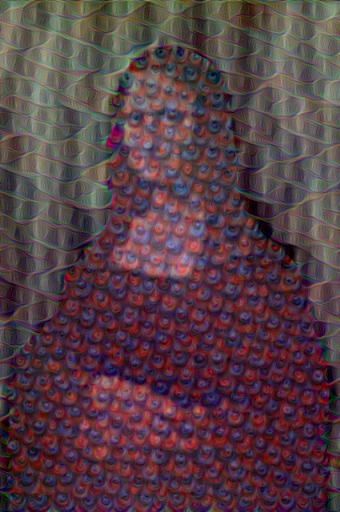

In [2]:
channels = get_random_favorites(layers_m3, 2)

config = {
    'objective': channels,
    'num_octaves': 5,
    'octave_ratio': 1.333,
    'num_iterations': 32,
    'lap_n': 5,
    'masks': [
        'images/monalisa1a.png',
        'images/monalisa1b.png'
    ],
    'step': 1.25,
    'size': 512,
    'grayscale_gradients': False,
    'normalize_gradients': True
}


img = load_image('images/monalisa.jpg', 128)  #random_image((2048, 2048))
img = run_deepdream(deepdream, config, img)
display(img)
save(img, 'output.png')

